In [ ]:
"""Analyze and visualize sentiment patterns in social media data to understand public opinion and
attitudes towards specific topics or brands."""

Positive    4
Negative    2
Name: Sentiment, dtype: int64


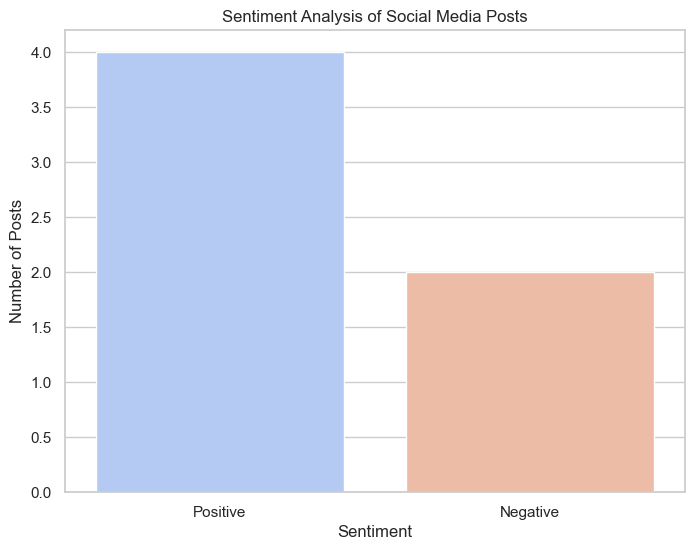

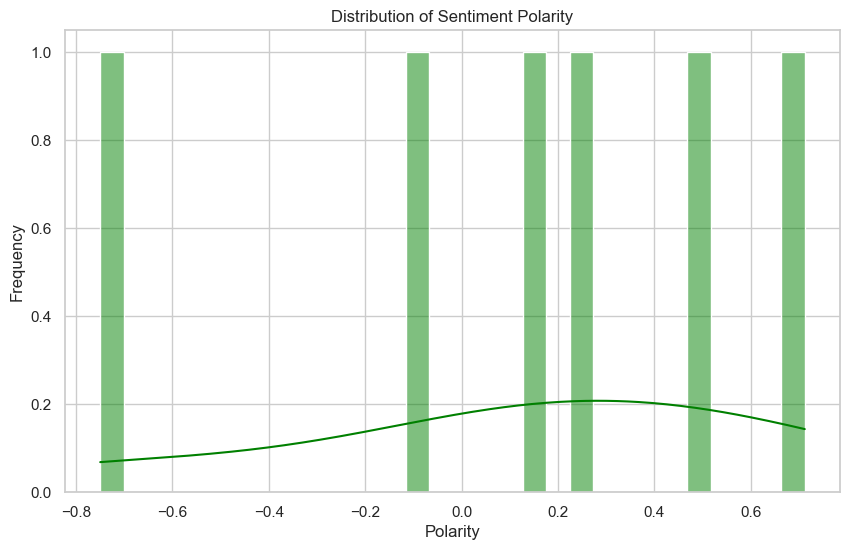

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Assuming df is your DataFrame with a column 'text' containing social media posts
# Example DataFrame creation (replace this with your actual data loading code)
data = {
    'text': [
        'I love this product! It works great.',
        'This is the worst service I have ever experienced.',
        'It’s okay, not bad but not great either.',
        'Absolutely fantastic! Exceeded my expectations.',
        'I am disappointed with the quality.',
        'This brand never fails to impress me.'
    ]
}

df = pd.DataFrame(data)

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to the DataFrame
df['Sentiment'] = df['text'].apply(get_sentiment)

# Display the sentiment distribution
print(df['Sentiment'].value_counts())

# Visualize the sentiment distribution
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Analysis of Social Media Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

# If you want to visualize sentiment polarity scores
df['Polarity'] = df['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Plotting polarity scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Polarity'], kde=True, bins=30, color='green')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


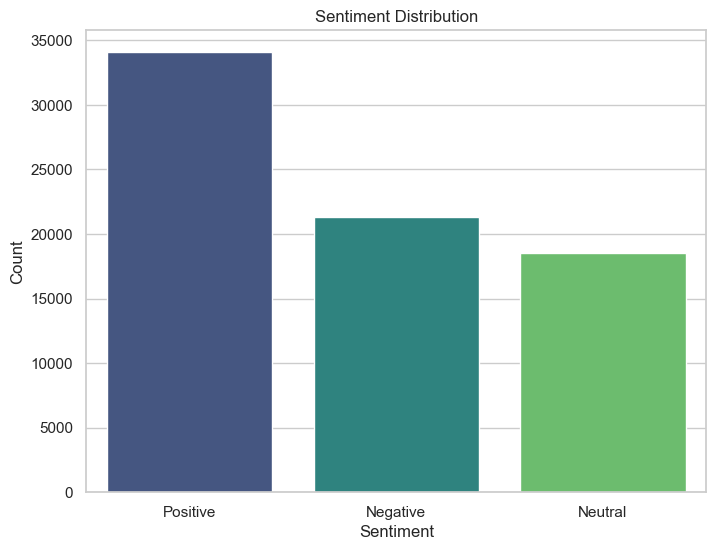

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the dataset
url = "twitter_training.csv"
df = pd.read_csv(url)

# Check the columns in the dataset
print(df.columns)

# Identify the correct column containing the text
# Assuming the column name might be 'tweet' or something similar based on the print statement
text_column = 'im getting on borderlands and i will murder you all ,'  # Replace with the correct column name if necessary

# Drop rows with missing values in the text column
df = df.dropna(subset=[text_column])

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment function
df['sentiment'] = df[text_column].apply(get_sentiment)

# Count sentiment occurrences
sentiment_counts = df['sentiment'].value_counts()

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Analyze sentiment over time (if timestamp is available)
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)
    sentiment_over_time = df.resample('D').sentiment.value_counts().unstack().fillna(0)

    sentiment_over_time.plot(figsize=(12, 8))
    plt.title('Sentiment Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.show()


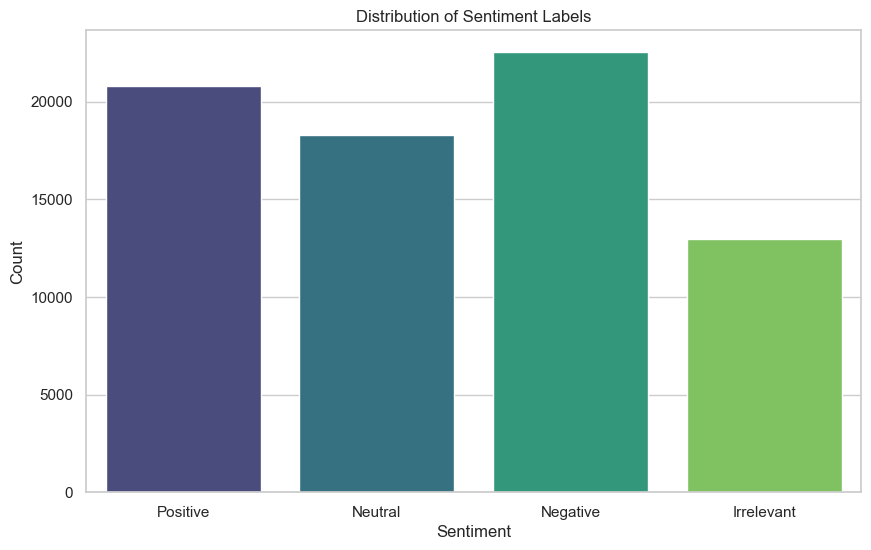

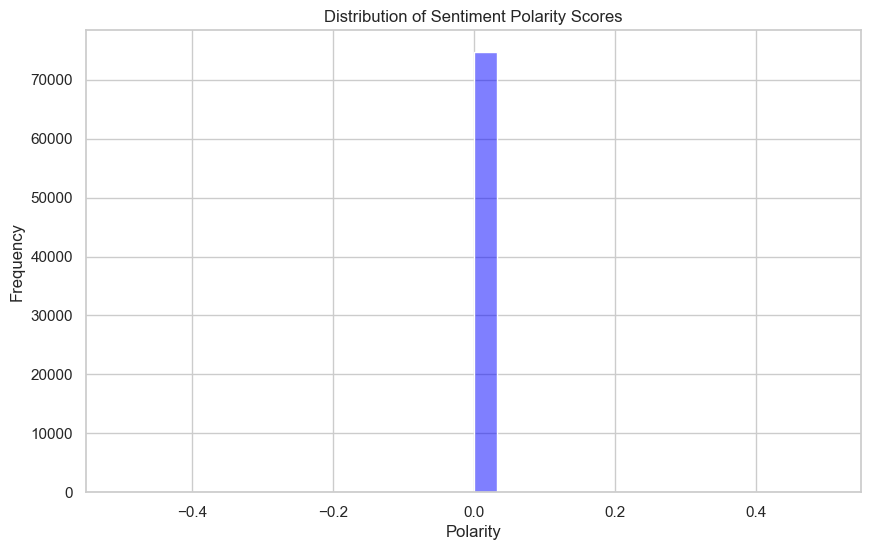

Word Cloud for Positive Sentiment:


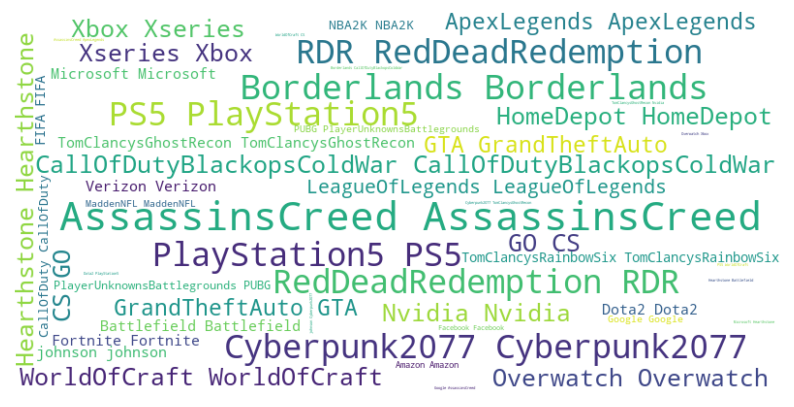

Word Cloud for Negative Sentiment:


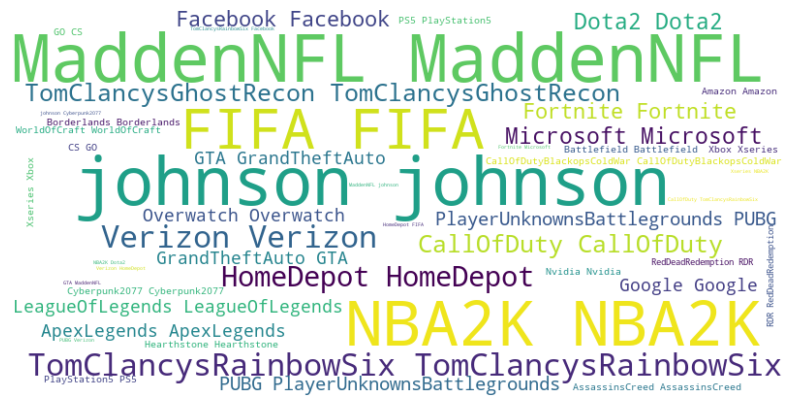

Word Cloud for Neutral Sentiment:


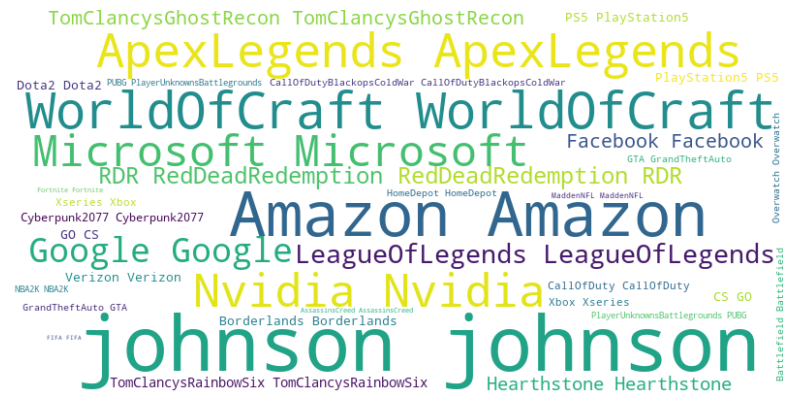

Word Cloud for Irrelevant Sentiment:


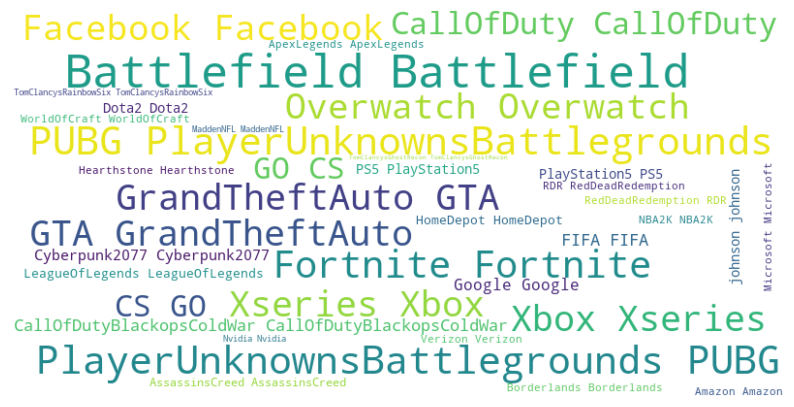

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('twitter_training.csv')

# Assign column names based on inspection
text_column = 'Borderlands'  # Column with the text of the tweet
sentiment_column = 'Positive'  # Column with sentiment labels

# Perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Apply sentiment analysis
df['polarity'] = df[text_column].apply(analyze_sentiment)

# Map sentiment labels to numerical values for plotting
sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0, 'Irrelevant': 0}  # Adjust if needed
df['sentiment_numeric'] = df[sentiment_column].map(sentiment_map)

# Visualization: Distribution of Sentiment Labels
plt.figure(figsize=(10, 6))
sns.countplot(x=sentiment_column, data=df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualization: Distribution of Sentiment Polarity Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Generate and display word clouds for each sentiment category
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment category
for sentiment in ['Positive', 'Negative', 'Neutral', 'Irrelevant']:
    text = df[df[sentiment_column] == sentiment][text_column]
    print(f"Word Cloud for {sentiment} Sentiment:")
    generate_wordcloud(text)